# **Families of ML algorithms**

There are several categories for machine learning algorithms, below are some of these categories:

**Linear**

1.Linear Regression

2.Logistic Regression

3.Support Vector Machines

**Tree-Based**

1. Decision Tree

2.Random Forest

3.GBDT

KNN

Neural Networks

**And if we want to categorize ML algorithms with the type of learning, there are below type:**

**Classification**

k-Nearest Neighbors
LinearRegression
SVM
DT
NN

**clustering**

1.K-means

2.HCA

3.Expectation Maximization

**Visualization and dimensionality reduction:**

Principal Component Analysis(PCA)
Kernel PCA
Locally -Linear Embedding (LLE)
t-distributed Stochastic Neighbor Embedding (t-SNE)
**Association rule learning**

Apriori
Eclat

**Semisupervised learning**

**Reinforcement Learning**

Q-learning  

**Batch learning & Online learning**
Ensemble Learning

**source**

https://www.kaggle.com/ranjeetjain3/visualization-machine-learning-deep-learning#-Description

# **import**

In [0]:
#@title All library 
 #%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

 #foundational package for scientific computing
import numpy as np

#collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import pandas as pd

#collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt

#Visualization
import seaborn as sns

#collection of functions for scientific computing and advance mathematics
import scipy as sp

#collection of plot
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

#collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl




from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score

import xgboost as xgb
import lightgbm as  lgb
#from xgboost.sklearn import XGBClassifier
#from catboost import CatBoostClassifier
 
 
  
  
  
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load Data

In [0]:
data =  pd.read_csv('diabetes.csv')

In [0]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
print(data.shape)

(768, 9)


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Missing data**


In [0]:

#Amount of data missing by columns
missing = [(c, data[c].isna().mean()*100) for c in data]
missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
missing = missing[missing.percentage > 0]
display(missing.sort_values("percentage", ascending=False))

,column_name,percentage


# **Data Cleaning**


In [0]:
print('Diabetes columns with null values: {} \n' .format( data.isnull().sum()))


Diabetes columns with null values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 



In [0]:
data.describe()

# **Visualization**

some graphical representation of information and data.




In [0]:
corelation = data.corr()
data = [go.Heatmap(z = np.array(corelation.values),
                   x = np.array(corelation.columns),
                   y = np.array(corelation.columns),
                     colorscale='Blackbody',)
       ]
py.iplot(data)

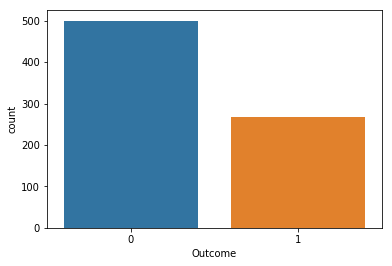

In [0]:
 sns.countplot(x="Outcome", data=data)  # How many people survived
  

In [0]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='Outcome', hue="Pregnancies", data=data,ax = saxis[0,0])   
#sns.countplot(x='Outcome', hue="Glucose", data=data,ax = saxis[0,1])
#sns.countplot(x="Outcome", hue="BloodPressure", data=data, ax = saxis[1,0])
sns.countplot(x="Outcome", hue="SkinThickness", data=data, ax = saxis[1,1])
sns.countplot(x="Outcome", hue="Insulin", data=data, ax = saxis[1,1])
#sns.countplot(x="Outcome", hue="BMI", data=data, ax = saxis[1,1])
#sns.countplot(x="Outcome", hue="DiabetesPedigreeFunction", data=data, ax = saxis[1,1])
#sns.countplot(x="Outcome", hue="Age", data=data, ax = saxis[1,1])


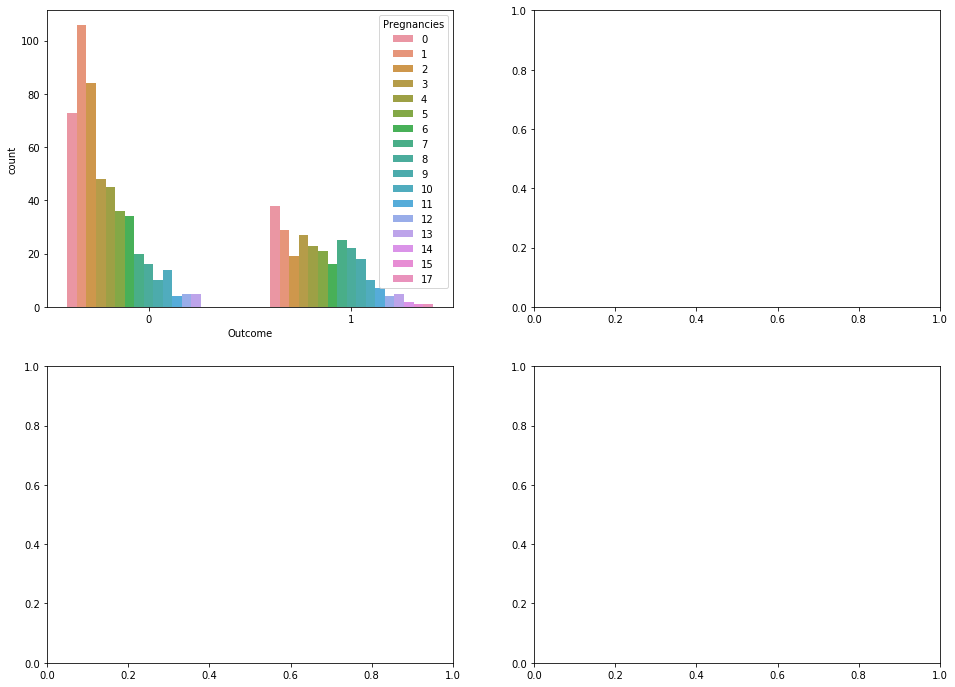

In [0]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 2,figsize=(16,12))
sns.countplot(x='Outcome', hue="Pregnancies", data=data,ax = saxis[0,0])
 

In [0]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data, hue = 'Outcome', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data['Age'].max()))
a.add_legend()

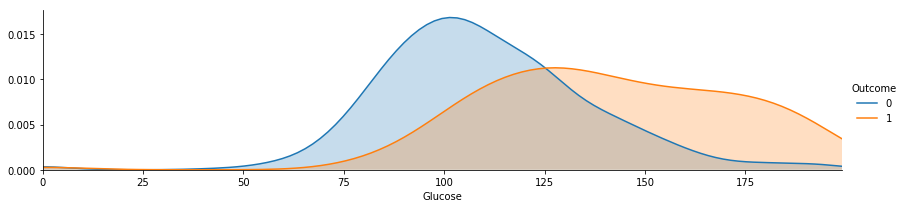

In [0]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data, hue = 'Outcome', aspect=4 )
a.map(sns.kdeplot, 'Glucose', shade= True )
a.set(xlim=(0 , data['Glucose'].max()))
a.add_legend()

In [0]:
plt.subplots(figsize = (10,8))

plotting.andrews_curves(df.drop("Age", axis=1), "Outcome")


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **set data of train & test**


In [0]:
x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']

In [0]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# **train Dataset (only apllyed train data set)**


In [0]:

# test_size = 0.3 means 30% , 0.5 meas 50%
train, test = train_test_split(data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)




(537, 9)
(231, 9)


In [0]:
# নতুন  y অবজেক্টগুলোর রেকর্ড সংখ্যা 
print(y_train.shape)
print(y_test.shape)

NameError: ignored

In [0]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [0]:
# নতুন  y অবজেক্টগুলোর রেকর্ড সংখ্যা 
print(y_train.shape)
print(y_test.shape)

(537,)
(231,)


In [0]:
# ৫টা রেকর্ডের মধ্যে ৩টা এসেছে এখানে 
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
711,5,126,78,27,22,29.6,0.439,40
58,0,146,82,0,0,40.5,1.781,44
216,5,109,62,41,129,35.8,0.514,25
168,4,110,66,0,0,31.9,0.471,29
658,11,127,106,0,0,39.0,0.190,51
257,2,114,68,22,0,28.7,0.092,25
39,4,111,72,47,207,37.1,1.390,56
247,0,165,90,33,680,52.3,0.427,23
637,2,94,76,18,66,31.6,0.649,23
668,6,98,58,33,190,34.0,0.430,43


In [0]:
# টার্গেট ভেক্টর আসতে হবে ওই ৩টাই 
y_train

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [0]:
y_test


766    1
748    1
42     0
485    1
543    0
445    1
427    1
352    0
428    0
123    0
525    0
587    0
616    0
648    1
678    1
227    1
31     1
113    0
116    1
210    0
318    0
692    0
689    1
683    1
423    0
715    1
446    0
267    0
90     0
191    0
      ..
346    0
746    1
109    1
347    0
72     1
336    0
545    1
548    0
464    0
400    1
16     1
601    0
80     0
98     0
126    0
182    0
279    0
752    0
62     0
172    0
213    1
111    1
384    0
268    0
186    1
188    1
8      1
645    0
381    0
314    1
Name: Outcome, Length: 231, dtype: int64

In [0]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,0,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25
445,0,180,78,63,14,59.4,2.420,25
427,1,181,64,30,180,34.1,0.328,38
352,3,61,82,28,0,34.4,0.243,46
428,0,135,94,46,145,40.6,0.284,26
123,5,132,80,0,0,26.8,0.186,69


In [0]:

train_test_split(y, shuffle=False)

[0      1
 1      0
 2      1
 3      0
 4      1
 5      0
 6      1
 7      0
 8      1
 9      1
 10     0
 11     1
 12     0
 13     1
 14     1
 15     1
 16     1
 17     1
 18     0
 19     1
 20     0
 21     0
 22     1
 23     1
 24     1
 25     1
 26     1
 27     0
 28     0
 29     0
       ..
 546    1
 547    0
 548    0
 549    0
 550    0
 551    0
 552    0
 553    0
 554    0
 555    0
 556    0
 557    0
 558    0
 559    0
 560    1
 561    1
 562    0
 563    0
 564    0
 565    0
 566    0
 567    0
 568    0
 569    1
 570    0
 571    0
 572    0
 573    0
 574    0
 575    0
 Name: Outcome, Length: 576, dtype: int64, 576    0
 577    1
 578    0
 579    1
 580    1
 581    0
 582    0
 583    0
 584    1
 585    0
 586    1
 587    0
 588    1
 589    0
 590    1
 591    0
 592    1
 593    0
 594    0
 595    1
 596    0
 597    0
 598    1
 599    0
 600    0
 601    0
 602    0
 603    1
 604    1
 605    0
       ..
 738    0
 739    1
 740    1
 741    

**source**: https://www.kaggle.com/ranjeetjain3/visualization-machine-learning-deep-learning#-Description
# **List of algorithms**
Since it is a classification problem we will be using

Logistic regression

Decision tree

KNN

SVM

Naive Bayes Classification

Random forest

XGBoost

LightGBM

**Logistic regression**

In [0]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)
print('Logistic Regression - ',accuracy_score(lr_predict,y_test))

Logistic Regression -  0.7835497835497836


**“Support Vector Machine”** (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line). (https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

In [0]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
svc_predict = svm_model.predict(x_test)
print('SVM - ',accuracy_score(svc_predict,y_test))

SVM -  0.7662337662337663


**Naive Bayes Classification**
<img src = "https://helloacm.com/wp-content/uploads/2016/03/Bayes_rule.png">

Naive Bayes is a simple, yet effective and commonly-used, machine learning classifier. It is a probabilistic classifier that makes classifications using the Maximum A Posteriori decision rule in a Bayesian setting. It can also be represented using a very simple Bayesian network. Naive Bayes classifiers have been especially popular for text classification, and are a traditional solution for problems such as spam detection. (https://towardsdatascience.com/introduction-to-naive-bayes-classification-4cffabb1ae54)



In [0]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict = nb_model.predict(x_test)
print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.7619047619047619


**Decision tree**

In [0]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train,y_train)
dt_predict = dt_model.predict(x_test)
print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.7445887445887446


**Random forest**

In [0]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)
print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.7662337662337663


**Extra Tree Classifier**

In [0]:
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train,y_train)
etc_predict = etc_model.predict(x_test)
print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))

**KNN**


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique. (https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)



In [0]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)
print('knn - ',accuracy_score(knn_predict,y_test))

knn -  0.70995670995671


**XGBoost**


The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

It’s no wonder then that CERN recognized it as the best approach to classify signals from the Large Hadron Collider. This particular challenge posed by CERN required a solution that would be scalable to process data being generated at the rate of 3 petabytes per year and effectively distinguish an extremely rare signal from background noises in a complex physical process. XGBoost emerged as the most useful, straightforward and robust solution.

(https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)

In [0]:
xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(x_train,y_train)
xg_model.score(x_test, y_test)

0.7705627705627706

# **Prepare Train and Test**
scikit-learn provides a helpful function for partitioning data, train_test_split, which splits out your data into a training set and a test set.

Training set for fitting the model Test set for evaluation only

The steps to building and using a model are:

**Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

**Fit**: Capture patterns from provided data. This is the heart of modeling.

**Predict**: Just what it sounds like

**Evaluate**: Determine how accurate the model's predictions are.

In [0]:
train_X = train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]# taking the training data features
train_y=train.Outcome# output of our training data
test_X= test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] # taking test data features
test_y =test.Outcome   #output value of test data

In [0]:
x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']

# **List of 17 algorithms (train + test algo)**


1.Decision Tree

2.RandomForest

# **1.Decision Tree**

In [0]:

# Decision Tree's
from sklearn.tree import DecisionTreeClassifier # মডেল + মডেল ক্লাস

Model = DecisionTreeClassifier()

Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       149
           1       0.68      0.51      0.58        82

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

[[129  20]
 [ 40  42]]
accuracy is 0.7402597402597403


# **2.RandomForest**

---



In [0]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)

Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       149
           1       0.78      0.39      0.52        82

    accuracy                           0.74       231
   macro avg       0.76      0.66      0.67       231
weighted avg       0.75      0.74      0.72       231

[[140   9]
 [ 50  32]]
accuracy is 0.7445887445887446


# **3 Logistic Regression**

In [0]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
#from sklearn import model_selection #another type of model

Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       149
           1       0.70      0.54      0.61        82

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

[[130  19]
 [ 38  44]]
accuracy is 0.7532467532467533


# **4 K-Nearest Neighbors**

In [0]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       149
           1       0.78      0.51      0.62        82

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.77      0.76       231

[[137  12]
 [ 40  42]]
accuracy is 0.7748917748917749


# **5 Naive Bayes**

In [0]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       149
           1       0.75      0.65      0.69        82

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231

[[131  18]
 [ 29  53]]
accuracy is 0.7965367965367965


**6 SVM**


In [0]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.65      1.00      0.78       149
           1       0.00      0.00      0.00        82

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231

[[149   0]
 [ 82   0]]
accuracy is 0.645021645021645


# **7 Nu-Support Vector Classification**

In [0]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

ModelNU = NuSVC()


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.65      1.00      0.78       149
           1       0.00      0.00      0.00        82

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231

[[149   0]
 [ 82   0]]
accuracy is 0.645021645021645


# **8 Linear Support Vector Classification**

In [0]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()



Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.93      0.17      0.28       149
           1       0.39      0.98      0.56        82

    accuracy                           0.45       231
   macro avg       0.66      0.57      0.42       231
weighted avg       0.74      0.45      0.38       231

[[ 25 124]
 [  2  80]]
accuracy is 0.45454545454545453


  
# **Linear Discriminant Analysis**

(discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a linear and a quadratic decision surface, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

In [0]:
 
#from sklearn.linear_model import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()

Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

#Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       149
           1       0.81      0.56      0.66        82

    accuracy                           0.80       231
   macro avg       0.80      0.74      0.76       231
weighted avg       0.80      0.80      0.79       231

[[138  11]
 [ 36  46]]
accuracy is 0.7965367965367965


# **9 Radius Neighbors Classifier**

In [0]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=148)


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       149
           1       0.60      0.04      0.07        82

    accuracy                           0.65       231
   macro avg       0.63      0.51      0.43       231
weighted avg       0.63      0.65      0.53       231

[[147   2]
 [ 79   3]]
accuracy is 0.6493506493506493


# **10 Passive Aggressive Classifier**

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       149
           1       0.36      1.00      0.53        82

    accuracy                           0.36       231
   macro avg       0.68      0.50      0.27       231
weighted avg       0.77      0.36      0.20       231

[[  1 148]
 [  0  82]]
accuracy is 0.3593073593073593


# **11 BernoulliNB**

In [0]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       149
           1       0.00      0.00      0.00        82

    accuracy                           0.64       231
   macro avg       0.32      0.49      0.39       231
weighted avg       0.41      0.64      0.50       231

[[147   2]
 [ 82   0]]
accuracy is 0.6363636363636364


# **12 ExtraTreeClassifier**

In [0]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()



Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       149
           1       0.47      0.37      0.41        82

    accuracy                           0.63       231
   macro avg       0.58      0.57      0.57       231
weighted avg       0.61      0.63      0.62       231

[[115  34]
 [ 52  30]]
accuracy is 0.6277056277056277


# **13 Bagging classifier**

In [0]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       149
           1       0.74      0.56      0.64        82

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

[[133  16]
 [ 36  46]]
accuracy is 0.7748917748917749


# **14 AdaBoost classifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()

Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       149
           1       0.73      0.59      0.65        82

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

[[131  18]
 [ 34  48]]
accuracy is 0.7748917748917749


# **15 Gradient Boosting Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()


Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       149
           1       0.73      0.59      0.65        82

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

[[131  18]
 [ 34  48]]
accuracy is 0.7748917748917749


# **16 Linear Discriminant Analysis**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()

Model.fit(train_X, train_y)

y_predL = Model.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       149
           1       0.81      0.56      0.66        82

    accuracy                           0.80       231
   macro avg       0.80      0.74      0.76       231
weighted avg       0.80      0.80      0.79       231

[[138  11]
 [ 36  46]]
accuracy is 0.7965367965367965


# **17 Quadratic Discriminant Analysis**

In [0]:
 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()

Model.fit(train_X, train_y) #ডাটাকে সাজাই ফীচার ম্যাট্রিক্স এবং টার্গেট ভেক্টরের মতো করে।
y_predL = Model.predict(test_X) #নতুন ডাটার লেবেল প্রেডিক্ট করা।


# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       149
           1       0.70      0.54      0.61        82

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

[[130  19]
 [ 38  44]]
accuracy is 0.7532467532467533


# **18.Confusion Matrix**

In [0]:
#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression


#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Model=QuadraticDiscriminantAnalysis()
 
#from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Model.fit(train_X, train_y) #ডাটাকে সাজাই ফীচার ম্যাট্রিক্স এবং টার্গেট ভেক্টরের মতো করে।
y_predL = Model.predict(test_X) #নতুন ডাটার লেবেল প্রেডিক্ট করা।


# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score

print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       149
           1       0.73      0.56      0.63        82

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

[[132  17]
 [ 36  46]]
accuracy is 0.7705627705627706


# **19 Quadratic Discriminant Analysis**

A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class.


In [0]:



 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()

Model.fit(train_X, train_y) #ডাটাকে সাজাই ফীচার ম্যাট্রিক্স এবং টার্গেট ভেক্টরের মতো করে।
y_predL = Model.predict(test_X) #নতুন ডাটার লেবেল প্রেডিক্ট করা।


# Summary of the predictions made by the classifier
print(classification_report(test_y, y_predL))
print(confusion_matrix(test_y, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test_y))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       149
           1       0.70      0.54      0.61        82

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

[[130  19]
 [ 38  44]]
accuracy is 0.7532467532467533


In [0]:
import datetime

In [0]:
models = pd.DataFrame({
    'Model': [
        'Decision Tree', 'Random Forest',
              'LogisticRegression','K-Nearest Neighbours', 'Naive Bayes', 'SVM', 'Nu-Support Vector Classification',
             'Linear Support Vector Classification', 'Radius Neighbors Classifier', 'Passive Aggressive Classifier','BernoulliNB',
             'ExtraTreeClassifier', "Bagging classifier ", "AdaBoost classifier", 'Gradient Boosting Classifier' ,'Linear Discriminant Analysis',
             'Quadratic Discriminant Analysis'],
    'Score': [DT, RT,LR, KNN,NBB,SVMm, NuS,  LSVM , RNC, PAC, Ber, ETC, BCC, AdaB,  GBCC, LDAA, QDAx]})
models.sort_values(by='Score', ascending=False)

NameError: ignored

# **Compare Algorithms**


LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.697779 (0.071275)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


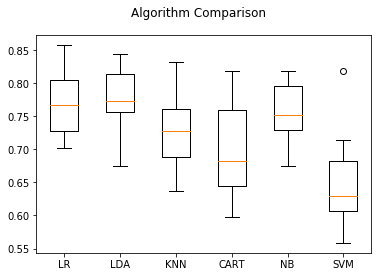

In [0]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()